In [1]:
from modules_features_extraction import *
import cv2
import matplotlib.pyplot as plt

In [2]:
N_COMPONENT = 50  # using for PCA

# # # train # # #
PATH_DATA_TRAIN = "../../dataset/data_argument_(80.0-20.0)_2022-06-01 09_49_48.750022/train/gray"
PATH_SAVE_MODEL_TRAIN = "../../output_data_train"
# # # test # # #
PATH_DATA_TEST = "../../dataset/data_argument_(80.0-20.0)_2022-06-01 09_49_48.750022/test/gray"
PATH_SAVE_MODEL_TEST = "../../output_data_test"

In [3]:
data, label = load_data(PATH_DATA_TRAIN)


Step 1/3: Loading data...
Done! 
Shape of data:  (2400, 4096)


In [4]:
n, size = data.shape

In [5]:
# tinh vector ky vong
meanX = np.mean(data, axis=0)
meanX.shape

(4096,)

In [6]:
meanX_dis = meanX.reshape(64,64)
meanX_dis.shape

(64, 64)

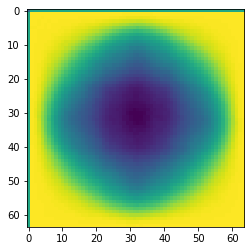

In [7]:
plt.imshow(np.uint8(meanX_dis))
# cv2.waitKey(0)

In [8]:
X = data-meanX

In [9]:
covar_matrix = np.cov(X, rowvar=False)
covar_matrix.shape

(4096, 4096)

In [10]:
values, vectors = eigh(covar_matrix)

In [11]:
vectors.shape

(4096, 4096)

In [18]:
sorted_index = np.argsort(values)[::-1]
sorted_eigenvectors = vectors[:, sorted_index]
eigenvector_subnet = sorted_eigenvectors[:, 0:N_COMPONENT]

In [19]:
D = eigenvector_subnet
D.shape

(4096, 50)

In [22]:
D = D.T

In [23]:
Y = np.dot(X,D)
Y.shape

(2400, 50)

In [24]:
# khoi phuc anh
reimg = np.dot(Y[1][:],D.T)
reimg.shape

(4096,)

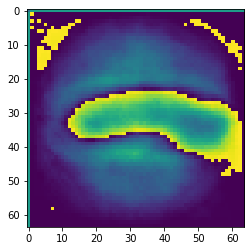

In [25]:
plt.imshow(np.uint8(reimg.reshape(64,64)))
# cv2.waitKey(0)

In [26]:
cv2.imshow("ta",np.uint8(reimg.reshape(64,64)))
cv2.waitKey(0)

48